In [43]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols
tickers = ["AMC", "BB", "GME"]

# Define the date range
start_date = "2024-05-10"
end_date = "2024-05-15"

# Function to get the minute-by-minute data for a ticker
def get_minute_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, interval="1m")
    return data

# Create a dictionary to store the data
data_dict = {}

# Fetch the data for each ticker
for ticker in tickers:
    data_dict[ticker] = get_minute_data(ticker, start_date, end_date)

# Save the data to CSV files
for ticker in tickers:
    data_dict[ticker].to_csv(f"{ticker}_minute_data.csv")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [48]:


# Function to get options chain for a ticker
def get_option_data(stock_symbol, expiration_date):
    stock = yf.Ticker(stock_symbol)
    option_chain = stock.option_chain(expiration_date)
    return option_chain


for ticker in tickers:
    expy_dates = yf.Ticker(ticker).options
    all_call_symbols = []
    all_put_symbols = []
    for exp_date in expy_dates:
        options_chain = get_option_data(ticker, exp_date)
        all_call_symbols += list(options_chain.calls['contractSymbol'])
        all_put_symbols += list(options_chain.puts['contractSymbol'])
        
    call_string = " ".join(all_call_symbols)
    call_prices = yf.download(call_string, start=start_date, end=end_date, interval="1m")

    put_string = " ".join(all_put_symbols)
    put_prices = yf.download(put_string, start=start_date, end=end_date, interval="1m")
    
    adj_close_put_prices = put_prices['Adj Close']
    adj_close_call_prices = call_prices['Adj Close']
    
    adj_close_call_prices.to_csv(f"{ticker}_call_prices.csv")
    adj_close_put_prices.to_csv(f"{ticker}_put_prices.csv")


[*********************100%%**********************]  193 of 193 completed

1 Failed download:
['AMC250620C00007000']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-10 -> 2024-05-15)')
[*********************100%%**********************]  193 of 193 completed

1 Failed download:
['AMC250620P00007000']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-10 -> 2024-05-15)')
[*********************100%%**********************]  127 of 127 completed

4 Failed downloads:
['BB250117C00000500', 'BB260116C00001500', 'BB240621C00000500', 'BB240719C00000500']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-10 -> 2024-05-15)')
[*********************100%%**********************]  88 of 88 completed

25 Failed downloads:
['BB240719P00010000', 'BB240920P00004500', 'BB240920P00001000', 'BB240621P00007000', 'BB260116P00010000']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
['BB250117P00001000

In [49]:
gme_price = pd.read_csv("GME_minute_data.csv")
gme_price

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2024-05-10 09:30:00-04:00,17.930000,18.070000,17.670000,18.068800,18.068800,673100
1,2024-05-10 09:31:00-04:00,18.070000,18.230000,17.600000,17.799999,17.799999,254892
2,2024-05-10 09:32:00-04:00,17.746000,17.768600,17.290001,17.480000,17.480000,224151
3,2024-05-10 09:33:00-04:00,17.469999,17.700001,17.469999,17.650000,17.650000,82644
4,2024-05-10 09:34:00-04:00,17.620001,18.150000,17.600000,18.060101,18.060101,173267
...,...,...,...,...,...,...,...
1061,2024-05-14 15:55:00-04:00,49.130001,49.130001,48.150002,48.529999,48.529999,409675
1062,2024-05-14 15:56:00-04:00,48.509998,49.000000,48.119999,49.000000,49.000000,526868
1063,2024-05-14 15:57:00-04:00,49.000000,49.509998,48.209999,48.429901,48.429901,547008
1064,2024-05-14 15:58:00-04:00,48.430000,48.880001,48.200001,48.629902,48.629902,548811


In [52]:
gme_puts = pd.read_csv("GME_put_prices.csv")
gme_puts = gme_puts.fillna(method='ffill')
gme_puts

C:\Users\dmalo\AppData\Local\Temp\ipykernel_32356\3102475447.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gme_puts = gme_puts.fillna(method='ffill')


,Datetime,GME240517P00003000,GME240517P00004000,GME240517P00005000,GME240517P00005500,GME240517P00006000,GME240517P00006500,GME240517P00007000,GME240517P00007500,GME240517P00008000,...,GME260116P00015000,GME260116P00017000,GME260116P00020000,GME260116P00022000,GME260116P00025000,GME260116P00027000,GME260116P00030000,GME260116P00032000,GME260116P00035000,GME260116P00037000
0,2024-05-10 09:30:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-05-10 09:31:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-05-10 09:32:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-05-10 09:33:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-05-10 09:34:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,2024-05-14 15:55:00-04:00,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,...,4.81,5.80,7.75,8.95,11.69,13.23,13.2,17.52,17.799999,19.0
1053,2024-05-14 15:56:00-04:00,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,...,4.81,5.80,7.75,8.95,11.69,13.23,13.2,17.52,17.799999,19.0
1054,2024-05-14 15:57:00-04:00,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,...,4.70,5.80,7.75,8.95,11.69,13.23,13.2,17.52,17.799999,19.0
1055,2024-05-14 15:58:00-04:00,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,...,4.70,6.15,7.75,8.95,11.69,13.23,13.2,17.52,17.799999,19.0


In [72]:
merged_data = pd.merge(gme_price, gme_puts, on='Datetime', how='inner')
merged_data['Datetime'] = pd.to_datetime(merged_data['Datetime'])
merged_data.sort_values(by='Datetime', ascending=True, inplace=True)
merged_data['last_close'] = merged_data['Adj Close'].shift(1)
merged_data['change'] = merged_data['Open'] - merged_data['last_close']
merged_data

,Datetime,Open,High,Low,Close,Adj Close,Volume,GME240517P00003000,GME240517P00004000,GME240517P00005000,...,GME260116P00020000,GME260116P00022000,GME260116P00025000,GME260116P00027000,GME260116P00030000,GME260116P00032000,GME260116P00035000,GME260116P00037000,last_close,change
0,2024-05-10 09:30:00-04:00,17.930000,18.070000,17.670000,18.068800,18.068800,673100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-05-10 09:31:00-04:00,18.070000,18.230000,17.600000,17.799999,17.799999,254892,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.068800,0.001200
2,2024-05-10 09:32:00-04:00,17.746000,17.768600,17.290001,17.480000,17.480000,224151,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.799999,-0.053999
3,2024-05-10 09:33:00-04:00,17.469999,17.700001,17.469999,17.650000,17.650000,82644,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.480000,-0.010000
4,2024-05-10 09:34:00-04:00,17.620001,18.150000,17.600000,18.060101,18.060101,173267,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.650000,-0.029999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2024-05-14 15:55:00-04:00,49.130001,49.130001,48.150002,48.529999,48.529999,409675,0.01,0.01,0.01,...,7.75,8.95,11.69,13.23,13.2,17.52,17.799999,19.0,49.099899,0.030102
1049,2024-05-14 15:56:00-04:00,48.509998,49.000000,48.119999,49.000000,49.000000,526868,0.01,0.01,0.01,...,7.75,8.95,11.69,13.23,13.2,17.52,17.799999,19.0,48.529999,-0.020000
1050,2024-05-14 15:57:00-04:00,49.000000,49.509998,48.209999,48.429901,48.429901,547008,0.01,0.01,0.01,...,7.75,8.95,11.69,13.23,13.2,17.52,17.799999,19.0,49.000000,0.000000
1051,2024-05-14 15:58:00-04:00,48.430000,48.880001,48.200001,48.629902,48.629902,548811,0.01,0.01,0.01,...,7.75,8.95,11.69,13.23,13.2,17.52,17.799999,19.0,48.429901,0.000099


In [73]:
merged_data.set_index('Datetime').between_time('9:30', '9:30')


,Open,High,Low,Close,Adj Close,Volume,GME240517P00003000,GME240517P00004000,GME240517P00005000,GME240517P00005500,...,GME260116P00020000,GME260116P00022000,GME260116P00025000,GME260116P00027000,GME260116P00030000,GME260116P00032000,GME260116P00035000,GME260116P00037000,last_close,change
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-05-10 09:30:00-04:00,17.930000,18.070000,17.670000,18.068800,18.068800,673100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-13 09:30:00-04:00,26.340000,26.360001,25.270000,25.270000,25.270000,17453085,NaN,0.01,NaN,NaN,...,8.90,10.55,NaN,NaN,NaN,NaN,NaN,NaN,17.450001,8.889999
2024-05-14 09:30:00-04:00,64.830002,64.830002,60.380001,60.380001,60.380001,48123979,0.01,0.01,0.01,0.01,...,8.25,8.00,10.93,13.89,15.6,17.52,19.91,20.799999,30.444599,34.385403


In [115]:
opening_hour = merged_data.set_index('Datetime').between_time('9:30', '12:00')
opening_hour.reset_index(inplace=True)

In [116]:
monday = opening_hour[opening_hour['Datetime'].dt.day_name() == 'Monday']
tuesday = opening_hour[opening_hour['Datetime'].dt.day_name() == 'Tuesday']

In [117]:
put_columns = [col for col in merged_data.columns if 'P' in col]

friday_close = 17

low = 9.9
high = 10.1

# We relax the criteria to choose puts where the strike is above the average stock price
relaxed_selected_puts = [col for col in put_columns if float(col.split('P')[-1])/1000 > low and float(col.split('P')[-1])/1000 < high]

In [122]:
relaxed_selected_puts = ['GME240719P00010000']

In [123]:
5000/1000

5.0

In [124]:
import matplotlib.pyplot as plt

<Figure size 1200x800 with 0 Axes>

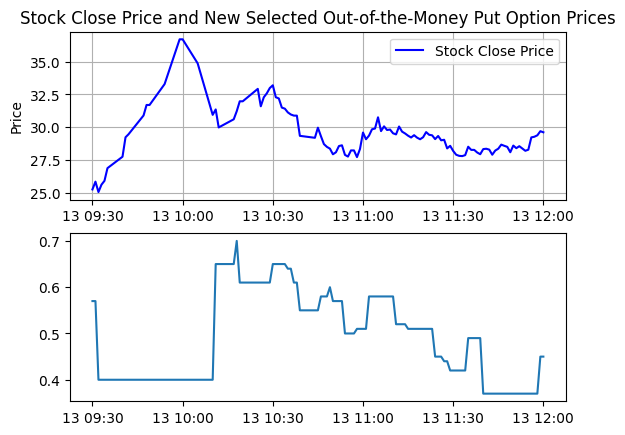

In [125]:
# Replotting the stock close price and the newly selected put option prices
plt.figure(figsize=(12, 8))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(monday['Datetime'], monday['Close'], label='Stock Close Price', color='blue')

# Plotting a few of the newly selected put options (up to 3 for clarity)
for put in relaxed_selected_puts:
    ax2.plot(monday['Datetime'], monday[put], label=f'Put Option {put}')

ax1.set_title('Stock Close Price and New Selected Out-of-the-Money Put Option Prices')

ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)
plt.show()